In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(('/content/drive/MyDrive/DA/CarPrice_Assignment.csv'))
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df['CarName'].nunique()

147

In [ ]:
df['carbody'].nunique()

5

#Check Duplicates

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.duplicated(subset=['CarName','fueltype','doornumber','carbody','fuelsystem']).sum()

18

In [ ]:
duplicates=df.duplicated(subset=['CarName','fueltype','doornumber','carbody','fuelsystem'])
duplicates.sum()

18

#Check Missing Value

In [ ]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#Regression

In [ ]:
car_prize=df.select_dtypes(include=['int64', 'float64'])
car_prize

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


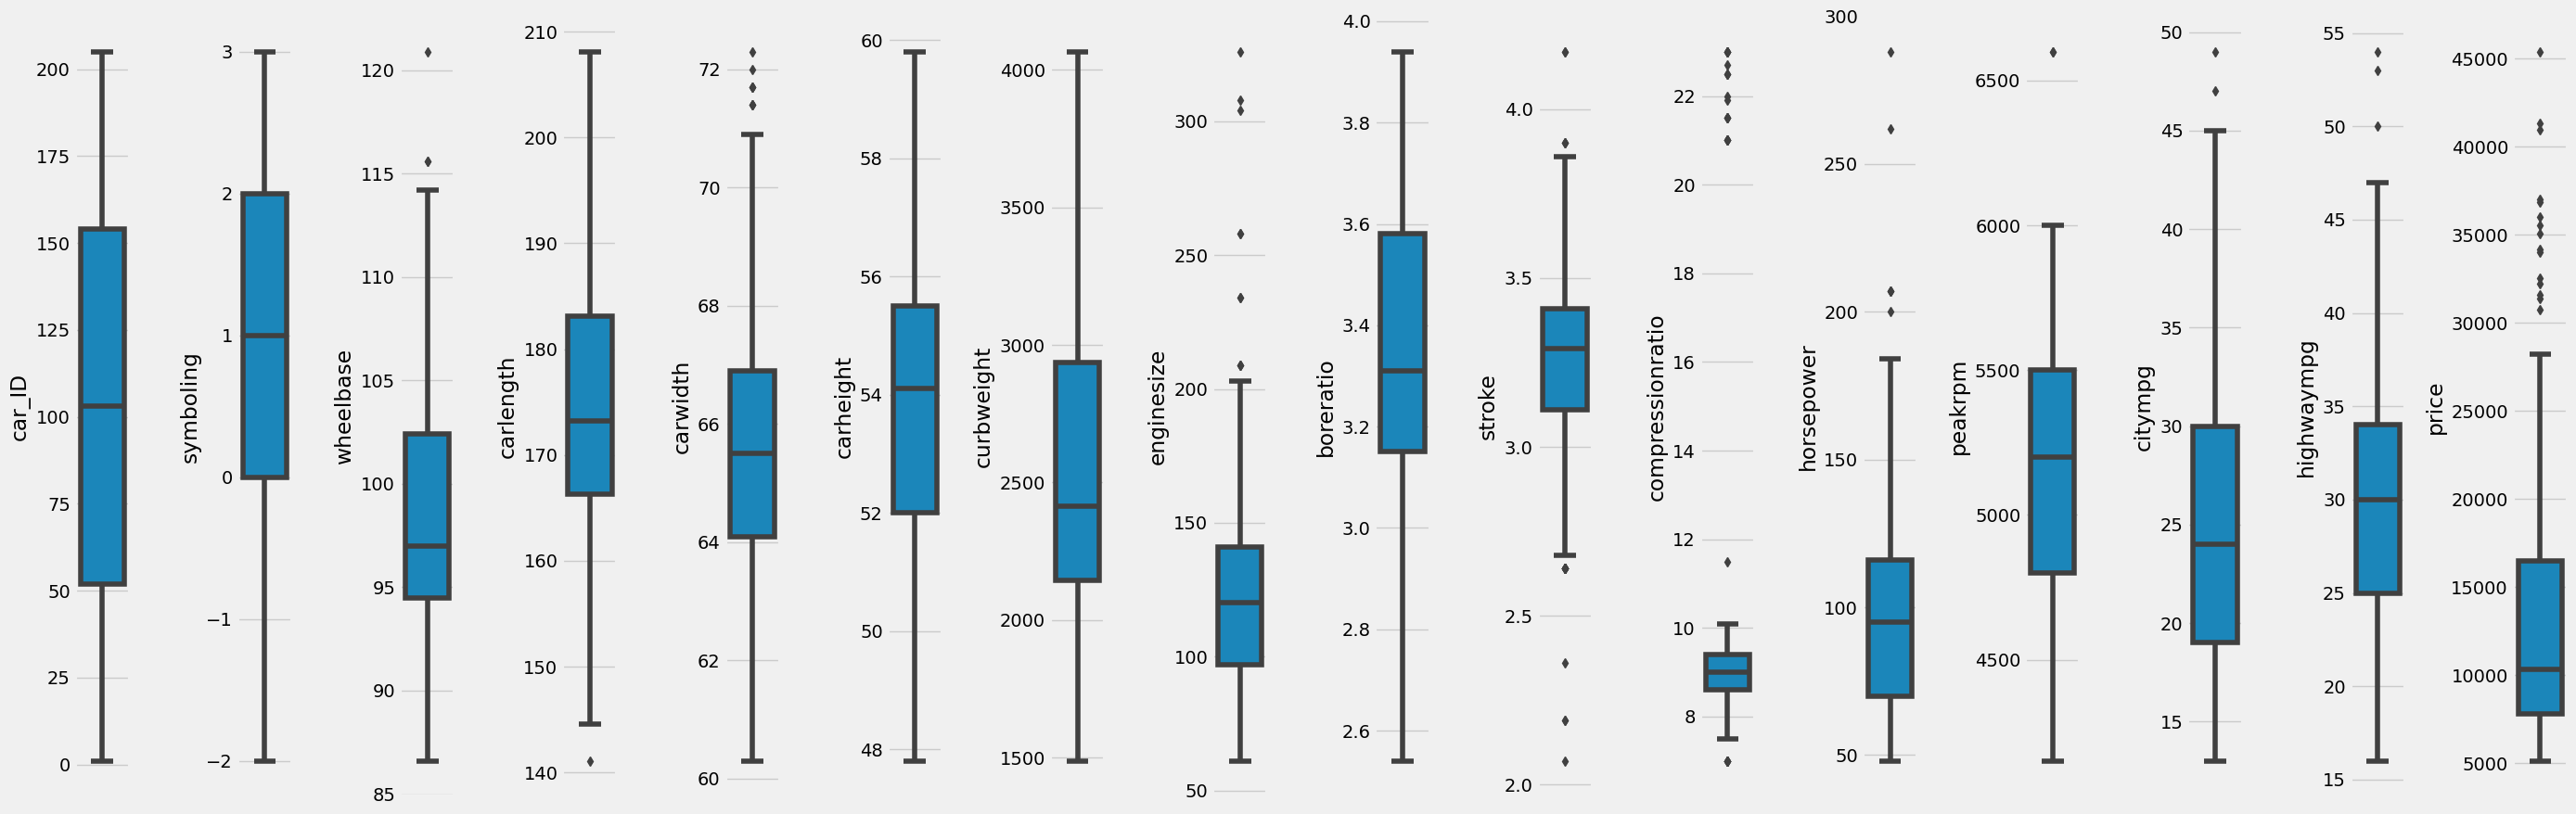

In [ ]:
features = car_prize.columns
plt.figure(figsize = (28,9)) # mengatur ukuran visualisasi

for i in range(0, len(features)):
    plt.subplot(1, 16, i+1)
    sns.boxplot(y=car_prize[features[i]], orient='v')
    plt.tight_layout()

In [ ]:
car_prize['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<Axes: >

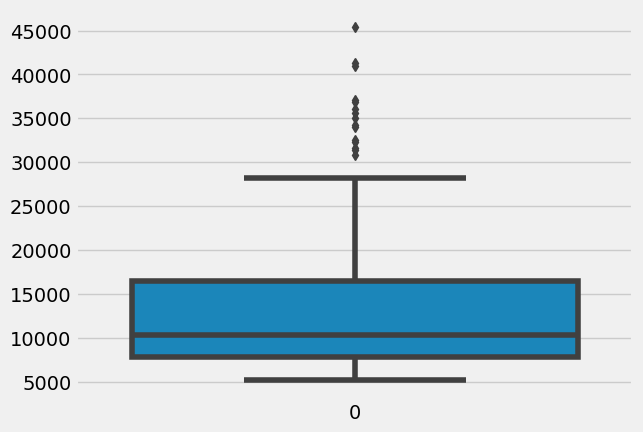

In [ ]:
sns.boxplot(car_prize['price'])

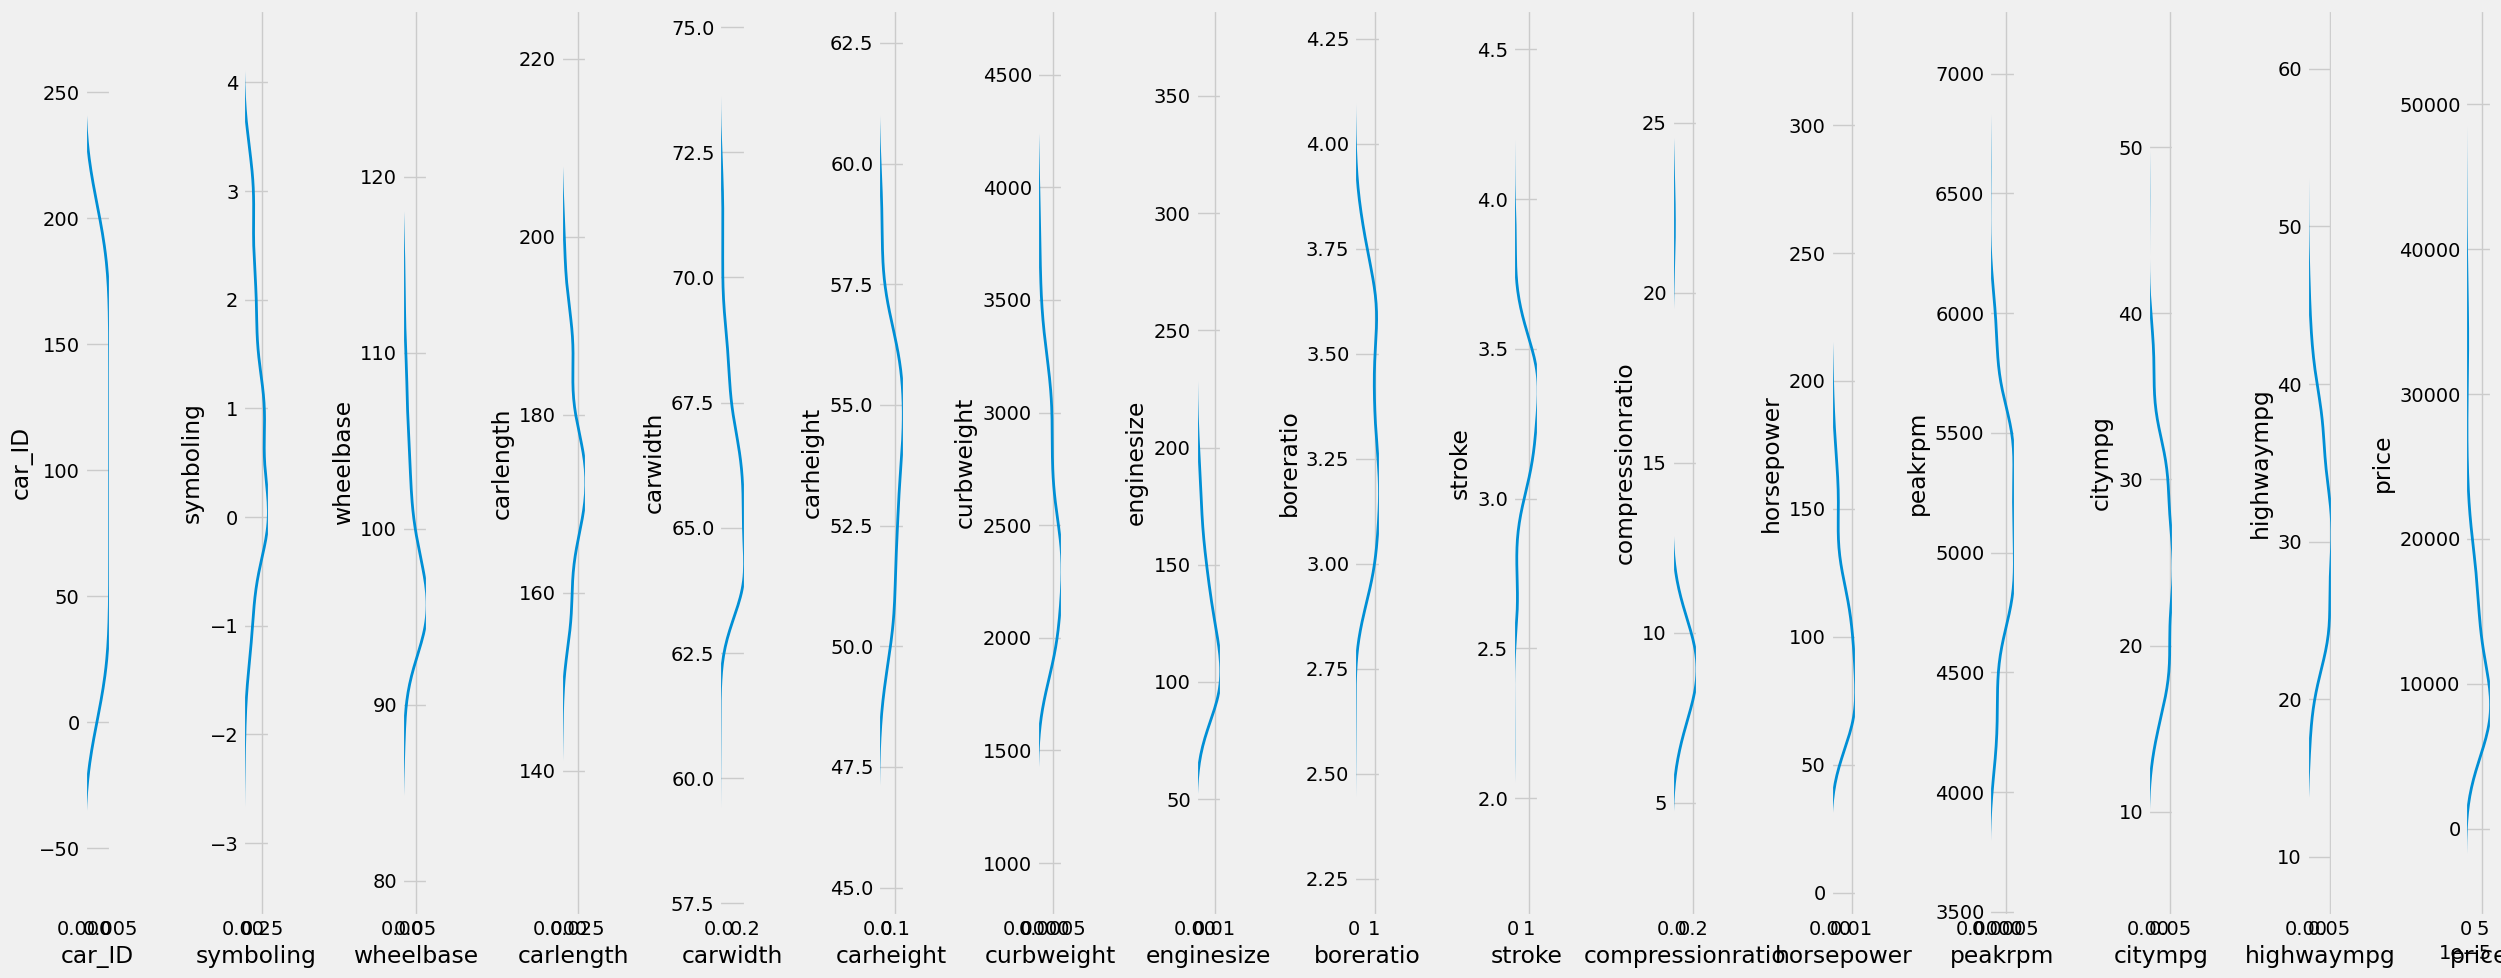

In [ ]:
features = car_prize.columns
plt.figure(figsize = (30,10))

for i in range(0, len(features)):
    plt.subplot(1, 19, i+1)
    sns.kdeplot(data = car_prize, y=features[i], linewidth=2)
    plt.xlabel(features[i])
    plt.tight_layout()

<Axes: >

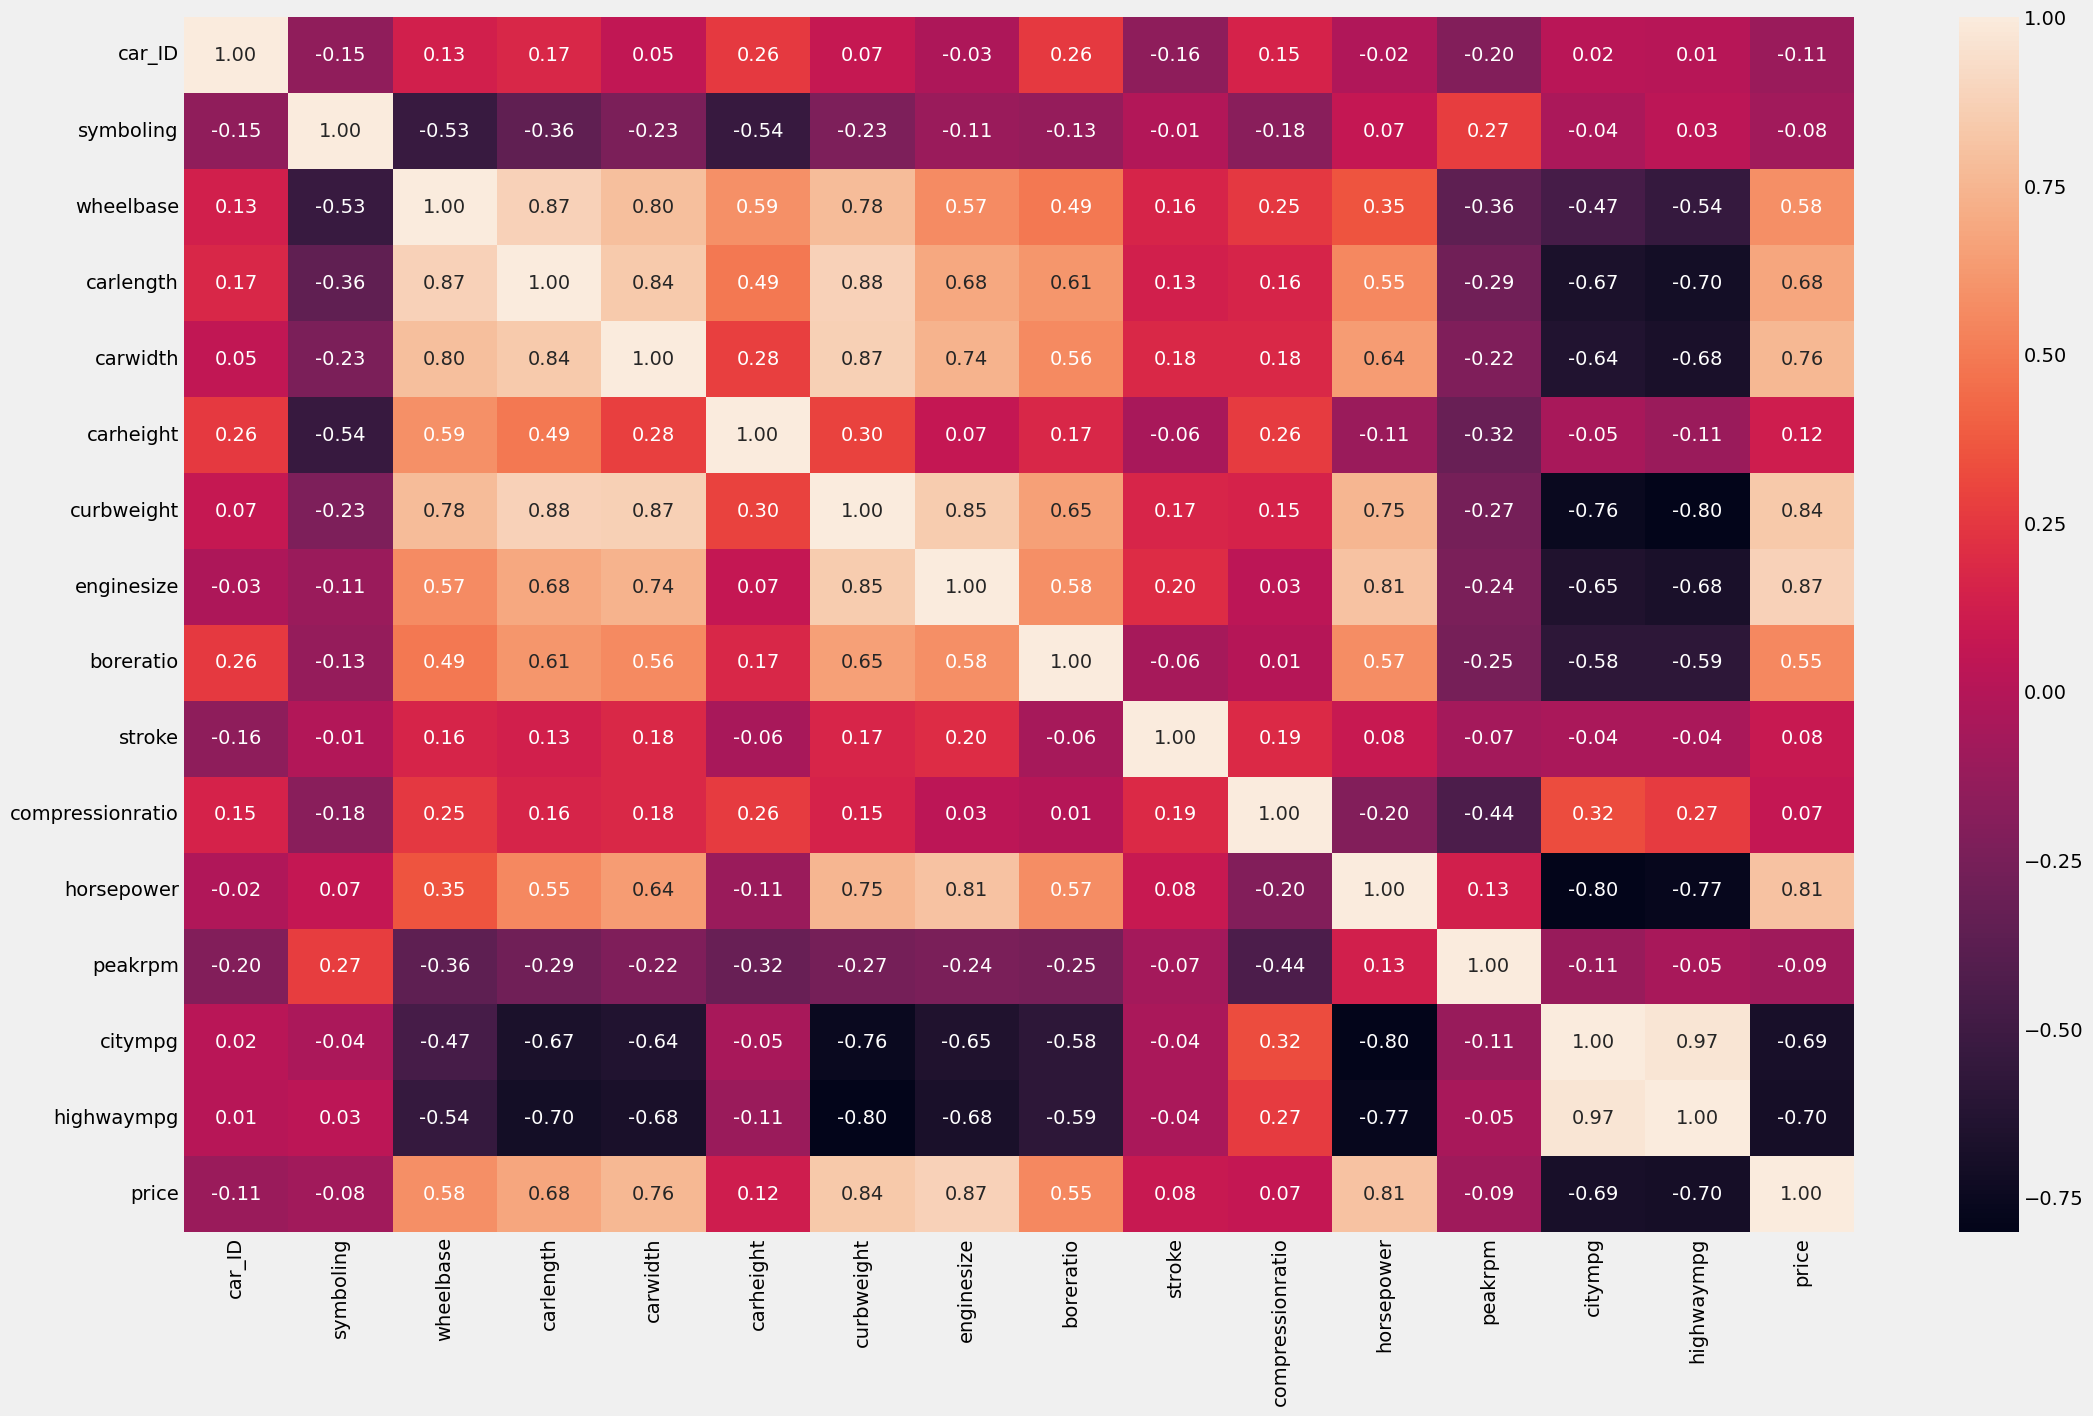

In [ ]:
# correlation
plt.figure(figsize = (24,15))
sns.heatmap(car_prize.corr(), annot=True, fmt='.2f')

<Figure size 2400x1500 with 0 Axes>

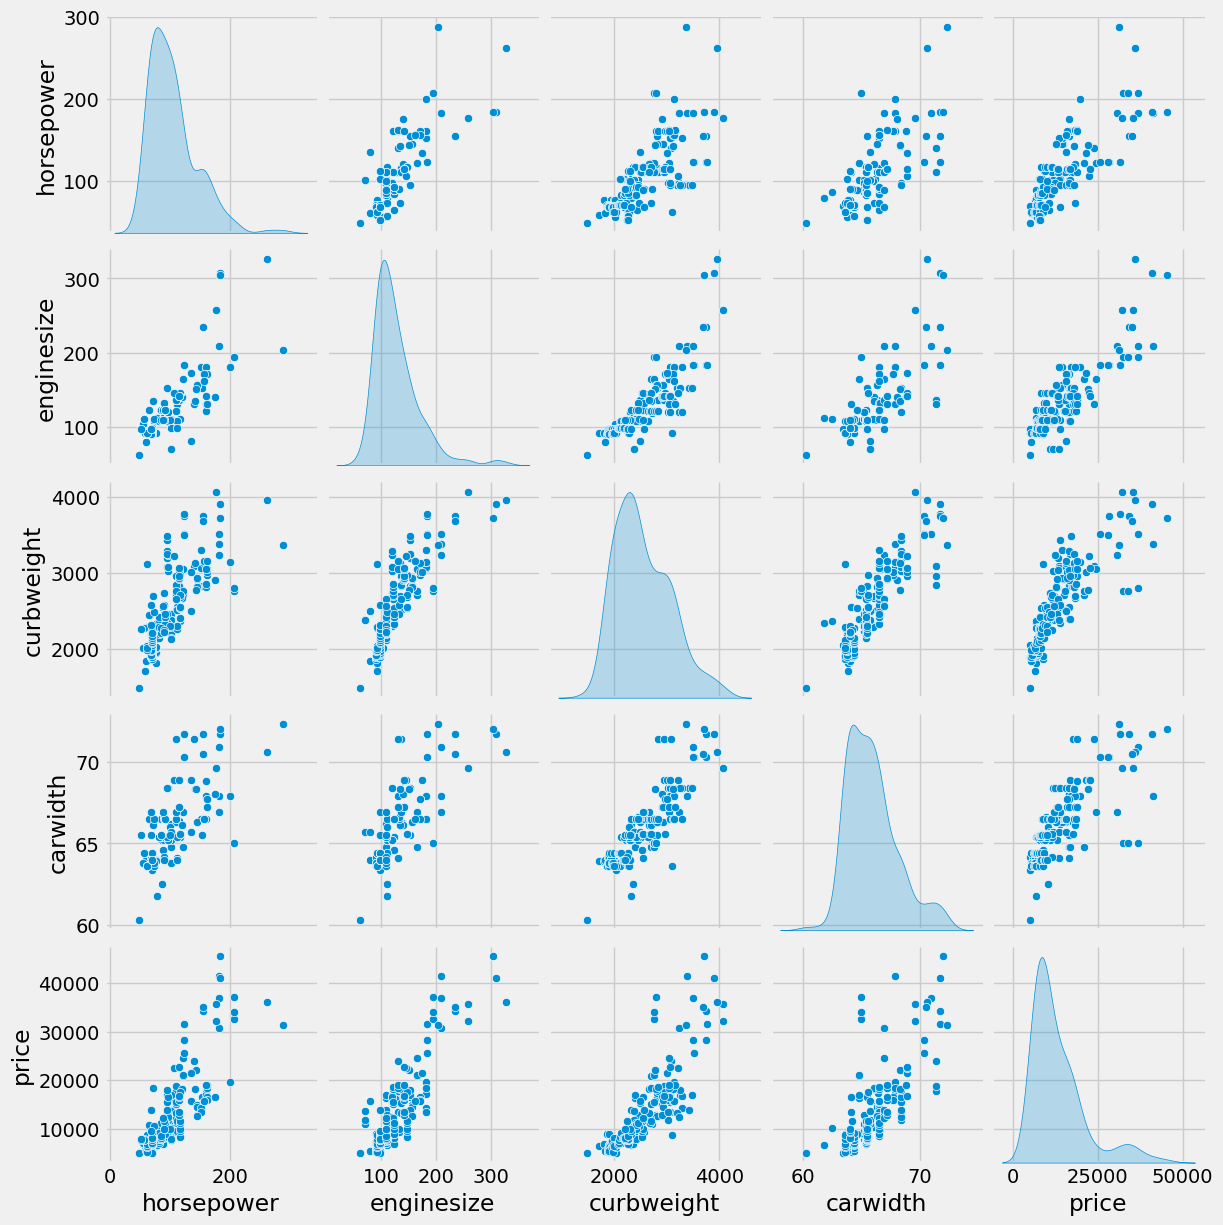

In [ ]:
# pairplot
plt.figure(figsize = (24,15))
sns.pairplot(car_prize[['horsepower','enginesize','curbweight','carwidth','price']], diag_kind = 'kde')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(car_prize.drop('price', axis=1), car_prize['price'], test_size=0.3, random_state=40)
X_train.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
145,146,0,97.0,172.0,65.4,54.3,2510,108,3.62,2.64,7.7,111,4800,24,29
111,112,0,107.9,186.7,68.4,56.7,3075,120,3.46,2.19,8.4,95,5000,19,24
86,87,1,96.3,172.4,65.4,51.6,2405,122,3.35,3.46,8.5,88,5000,25,32
113,114,0,114.2,198.9,68.4,56.7,3285,120,3.46,2.19,8.4,95,5000,19,24
121,122,1,93.7,167.3,63.8,50.8,1989,90,2.97,3.23,9.4,68,5500,31,38


In [ ]:
X_train.shape

(143, 15)

In [ ]:
len(X_train)

143

In [ ]:
len(X_test)

62

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
116,117,0,107.9,186.7,68.4,56.7,3252,152,3.70,3.52,21.00,95,4150,28,33
5,6,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25
89,90,1,94.5,165.3,63.8,54.5,1889,97,3.15,3.29,9.40,69,5200,31,37
35,36,0,96.5,163.4,64.0,54.5,2010,92,2.91,3.41,9.20,76,6000,30,34
185,186,2,97.3,171.7,65.5,55.7,2212,109,3.19,3.40,9.00,85,5250,27,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,3,99.1,186.6,66.5,56.1,2658,121,3.54,3.07,9.31,110,5250,21,28
52,53,1,93.1,159.1,64.2,54.1,1905,91,3.03,3.15,9.00,68,5000,31,38
62,63,0,98.8,177.8,66.5,55.5,2410,122,3.39,3.39,8.60,84,4800,26,32
174,175,-1,102.4,175.6,66.5,54.9,2480,110,3.27,3.35,22.50,73,4500,30,33


In [ ]:
reg.predict(X_test)

array([19012.30599983, 17376.30838513,  6949.04126198,  8397.22539078,
        9432.6878149 , 10035.17260001, 11989.42272092,  8823.67942387,
       24951.55808102,  4237.86436818, 10906.55194094,  9348.75797257,
        6729.23295798,  7309.35133641, 13420.52432922,  8689.33657951,
        5363.79411019,  9694.92215632,  7493.12275258, 10689.1267524 ,
        6718.13350988, 13825.14443501, 10898.0904803 ,  5750.21170243,
       13189.68747087, 18738.04502832,  1297.09215727, 15835.97367547,
       21244.50595685,  8657.30553134,  8945.54847617, 10798.69937394,
       13035.62076235,  7836.64171942, 15241.80569286, 13004.41578045,
        9501.40171079, 11295.75281674, 11385.37974713,  5744.27049032,
        4373.71489678, 16759.00404859,  4446.53166459, 39655.31671155,
       11175.23665576,  5508.0027609 ,  9680.78134583, 14323.04107811,
        5841.13875543, 25606.82351535, 21381.87637415,  7370.69051523,
       24391.33188463, 10778.24986304, 18966.13256609, 10852.08221914,
      

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, reg.predict(X_test))
mse = mean_squared_error(y_test, reg.predict(X_test))
rsquared = reg.score(X_test, y_test)

In [ ]:
print('MAE:', mae)
print('MSE:', mse)
print('R-squared:', rsquared)

MAE: 1987.6621069893251
MSE: 6646433.045137431
R-squared: 0.7903807545366932


In [ ]:
reg.coef_

array([-1.94029974e+01,  4.44121161e+02,  2.55750608e+02, -1.05884486e+02,
        6.72255393e+02,  3.73184724e+02, -1.02423563e+00,  1.02561170e+02,
        7.56304279e+02, -3.21861656e+03,  3.43366517e+02,  6.84074668e+01,
        1.61894431e+00, -3.87441461e+02,  2.96959963e+02])

In [ ]:
reg.intercept_

-76792.86521538711

In [ ]:
koefisien = pd.DataFrame(columns=['kolom', 'koefisien'])
koefisien['kolom'] = X_train.columns
koefisien['koefisien'] = reg.coef_

koefisien.head()

,kolom,koefisien
0,car_ID,-19.402997
1,symboling,444.121161
2,wheelbase,255.750608
3,carlength,-105.884486
4,carwidth,672.255393


In [ ]:
koefisien.sort_values('koefisien', ascending=False)

,kolom,koefisien
8,boreratio,756.304279
4,carwidth,672.255393
1,symboling,444.121161
5,carheight,373.184724
10,compressionratio,343.366517
14,highwaympg,296.959963
2,wheelbase,255.750608
7,enginesize,102.561170
11,horsepower,68.407467
12,peakrpm,1.618944


In [ ]:
koefisien[koefisien.koefisien.abs() > 1500].sort_values('koefisien', ascending=False)

,kolom,koefisien
9,stroke,-3218.616564
